<a href="https://colab.research.google.com/github/yamihe19/Project-Genes_Dataset-PCA-LDA/blob/main/Code_Genes_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project- Dimension Reduction of Genes Dataset using PCA and Linear Discriminant Analysis(PCA)


The dataset contains two main features:
•	x: the predictors composed of 500 genes. Each row is a gene expression profile and each column is different gene. The column names are the gene symbols.
•	y: The outcomes. A character vector representing the tissue. One of seven tissue types.


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df= pd.read_csv('gene.csv')
pd.set_option('display.max_columns', None)
df.head()

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

# 1.	Describe the measure of the features to see if there is a need to normalise or standardise. (10 points)

<Axes: xlabel='y', ylabel='count'>

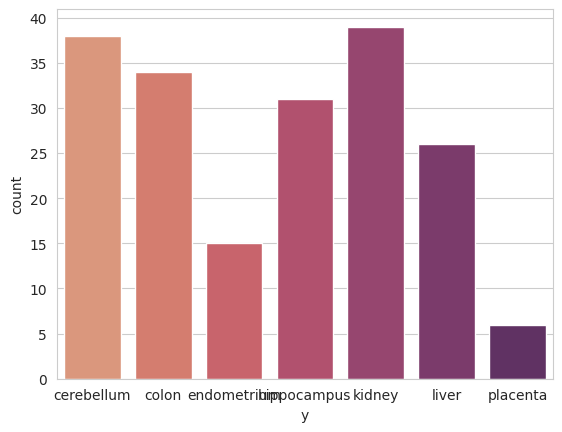

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'y', data = df, palette = 'flare')

In [ ]:
df.shape

(189, 501)

The dataset has 189 rows that are gene expressions.

In [ ]:
df.y.value_counts()


kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: y, dtype: int64

We can see in the column y differents kind of gene expressions of differents tissues. The  `y` is not balance that might need balance if is neccesary.

In [ ]:
df.describe()

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

# Intepretation:
We observe that there is limited variance within the dataset across different columns. The maximum values, minimum values, means, and medians appear to be quite similar. While it may not be strictly necessary to normalize the data, it is generally beneficial to do so before applying dimensionality reduction algorithms.

Also we can see that the SD is very small across all the columns or variables.

Normalizing the data through standardization ensures that all features are brought to a similar scale. This practice prevents certain features from dominating the variance during the dimensionality reduction process. Even if the features have similar ranges in this case, normalization can still enhance the performance and interpretability of dimensionality reduction techniques like PCA and LDA.


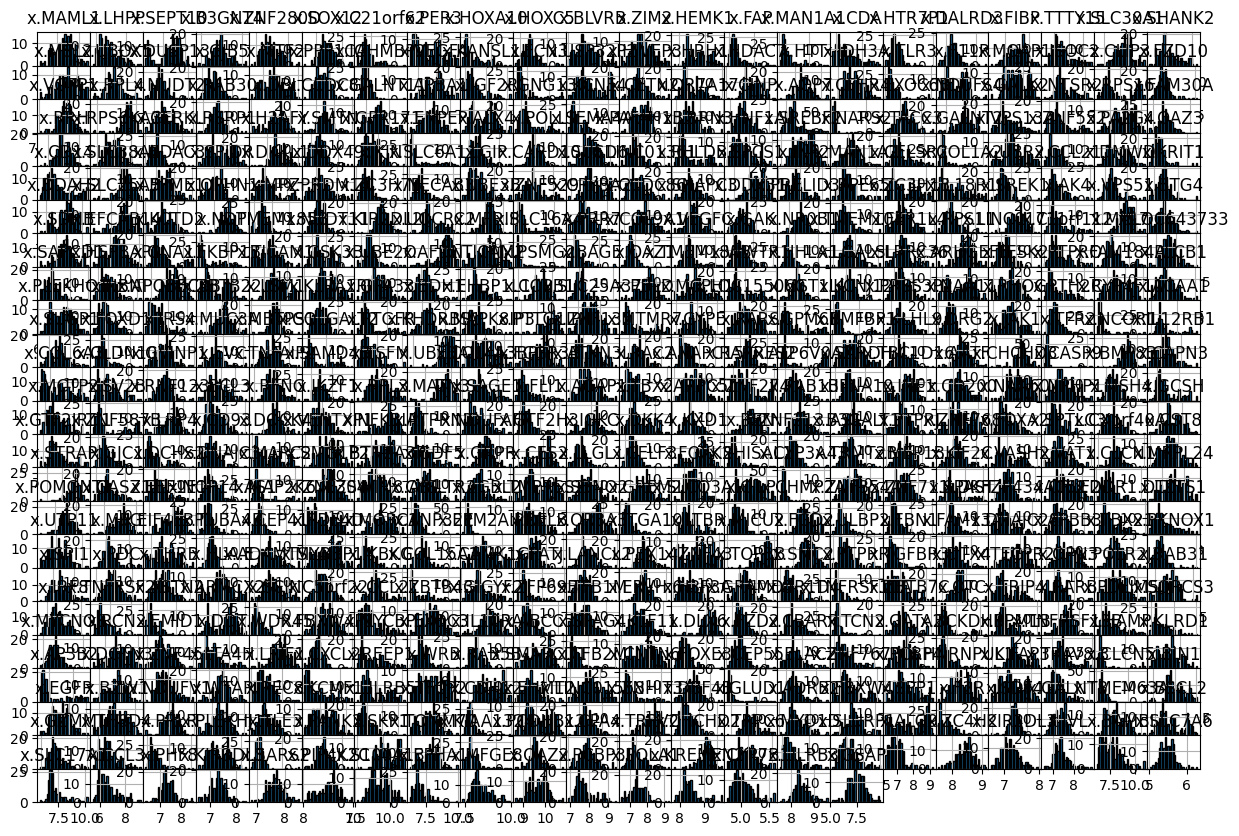

In [ ]:
df.hist(figsize=(15, 10), bins=35, edgecolor="black")
plt.subplots_adjust(hspace=0, wspace=0)

Interpretation:

It is difficult to see the data but almost all the variables are normally distributed. Some variables have skewness so might be beneficial to normalize the data through stadarization before using LDA or PCA

# 2.	If your client wish to get an idea of which observations are close to each other and knowing the fact that plotting 500 dimensions is difficult. What is your suggestion? Note you need to include a graph that show seven tissue types to address the question (20 points).

If my client want to get an idea of which observation are close to each other I will suggest use PCA, t-sne or LDA because those are techniques commonly used for reducing the dimensionality of high-dimensional data while preserving important information and relationships among observations. The difference is that PCA or t-sne is a not supervise ML and LDA is a supervise ML. So we are going to see all the methods in the graphs.

# Using PCA

In [ ]:

# Separate predictors (x) and outcomes (y)
x = df.drop('y', axis=1)
y = df['y']

In [ ]:
# Standardize the data (normalization)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Initialize PCA with 2 components for 2D visualization
pca = PCA(n_components=2, random_state=42)

In [ ]:
# Fit and transform the normalized data to 2D using PCA
x_pca = pca.fit_transform(x_normalized)

In [ ]:
x_pca

array([[-1.08849284e+01,  7.65892758e+00],
       [-9.75387514e+00,  8.56319310e+00],
       [-1.45959177e+01,  3.14267384e+00],
       [-1.51681309e+01,  2.41495560e+00],
       [-1.18402805e+01,  6.05180170e+00],
       [-1.22020819e+01,  5.81773713e+00],
       [-1.47736422e+01,  3.13295315e+00],
       [-1.15449670e+01,  6.12814126e+00],
       [-1.38162142e+01,  2.61860897e+00],
       [-1.01062119e+01,  6.35541087e+00],
       [-1.29165760e+01,  4.42089315e+00],
       [-1.46349497e+01,  2.59674217e+00],
       [-1.11917141e+01,  8.62121103e+00],
       [-1.46182581e+01,  3.11913852e+00],
       [-1.43293594e+01,  3.17250656e+00],
       [-1.39020210e+01,  4.17316765e+00],
       [-1.37956976e+01,  6.06817045e+00],
       [-1.67710853e+01,  4.43287684e-01],
       [-1.24176672e+01,  5.93513318e+00],
       [-1.54840626e+01,  2.62232934e+00],
       [-1.07175092e+01,  6.46577458e+00],
       [-1.35757760e+01,  3.73430996e+00],
       [-1.01762527e+01,  7.73135896e+00],
       [-1.

<ipython-input-26-7f7295bf76d6>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


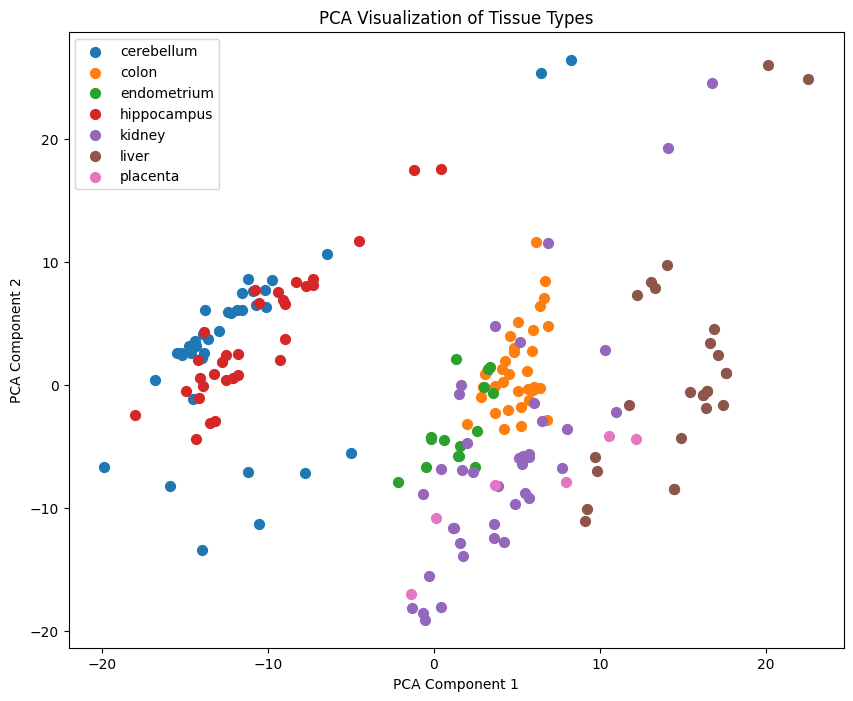

In [ ]:
# Create a DataFrame with the transformed data and the outcomes (tissues)
pca_df = pd.DataFrame({'pca_1': x_pca[:, 0], 'pca_2': x_pca[:, 1], 'tissue': y})

# Create a scatter plot for the PCA representation colored by tissue type
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.arange(7))
for tissue, color in zip(pca_df['tissue'].unique(), colors):
    plt.scatter(
        x=pca_df.loc[pca_df['tissue'] == tissue, 'pca_1'],
        y=pca_df.loc[pca_df['tissue'] == tissue, 'pca_2'],
        c=color,
        label=tissue,
        s=50,
    )
plt.legend()
plt.title('PCA Visualization of Tissue Types')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Using LDA

<ipython-input-21-dbc194bdb697>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


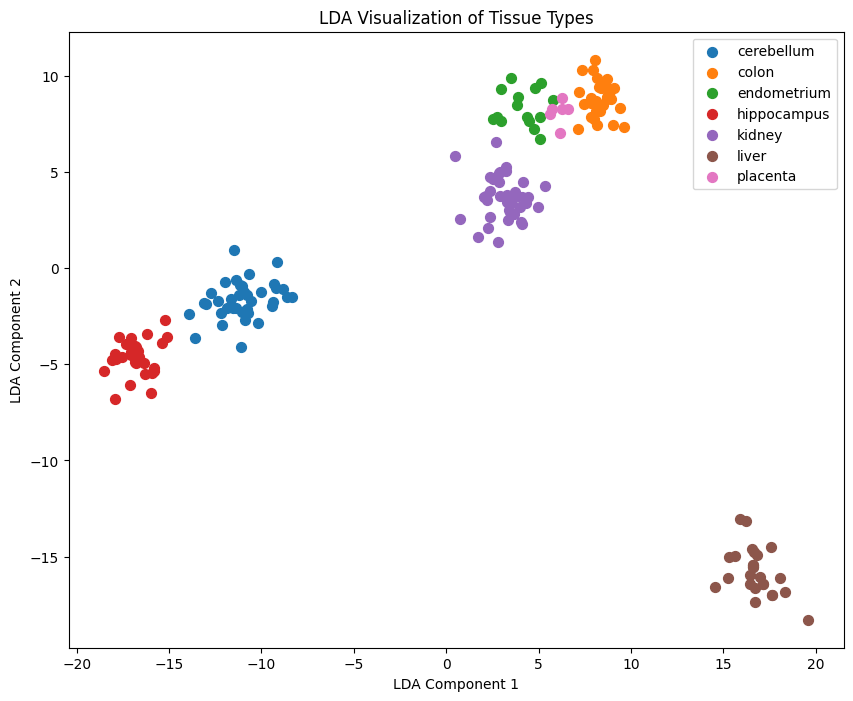

In [ ]:
# Initialize LDA with 2 components for 2D visualization
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the normalized data to 2D using LDA
x_lda = lda.fit_transform(x_normalized, y)

# Create a DataFrame with the transformed data and the outcomes (tissues)
lda_df = pd.DataFrame({'lda_1': x_lda[:, 0], 'lda_2': x_lda[:, 1], 'tissue': y})

# Create a scatter plot for the LDA representation colored by tissue type
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.arange(7))
for tissue, color in zip(lda_df['tissue'].unique(), colors):
    plt.scatter(
        x=lda_df.loc[lda_df['tissue'] == tissue, 'lda_1'],
        y=lda_df.loc[lda_df['tissue'] == tissue, 'lda_2'],
        c=color,
        label=tissue,
        s=50,
    )

plt.legend()
plt.title('LDA Visualization of Tissue Types')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

## Using T-sne

<ipython-input-20-ec8be7d74ae3>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


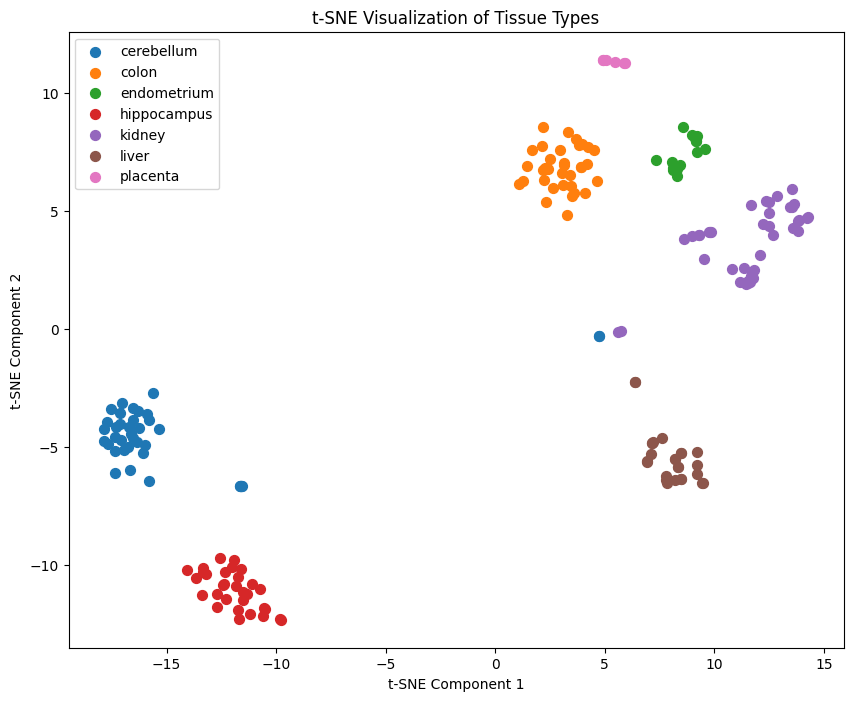

In [ ]:

from sklearn.manifold import TSNE
# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2D
x_tsne = tsne.fit_transform(x)

# Create a DataFrame with the transformed data and the outcomes (tissues)
tsne_df = pd.DataFrame({'tsne_1': x_tsne[:, 0], 'tsne_2': x_tsne[:, 1], 'tissue': y})

# Create a scatter plot for the t-SNE representation colored by tissue type
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.arange(7))
for tissue, color in zip(tsne_df['tissue'].unique(), colors):
    plt.scatter(
        x=tsne_df.loc[tsne_df['tissue'] == tissue, 'tsne_1'],
        y=tsne_df.loc[tsne_df['tissue'] == tissue, 'tsne_2'],
        c=color,
        label=tissue,
        s=50,
    )

plt.legend()
plt.title('t-SNE Visualization of Tissue Types')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Interpretation:
After reviewing the graphs, my recommendation would be to use either LDA or t-SNE if the goal is to gain insights into the proximity of observations within the dataset. Specifically, LDA and t-SNE are powerful techniques for visualizing and understanding the clustering or grouping patterns in high-dimensional data.

Considering computational efficiency, LDA would be my primary recommendation for this task, as it is generally less computationally expensive compared to t-SNE. LDA is particularly well-suited for dimensionality reduction and preserving class separability in the data, making it valuable for exploratory data analysis and visualization.

However, it's important to note that the effectiveness of PCA should not be dismissed without considering its parameters and specific use case. PCA is a widely used dimensionality reduction technique and can be highly effective in certain scenarios, especially when the primary objective is to capture the maximum variance in the data.

Ultimately, the choice between LDA, t-SNE, or PCA depends on the specific goals of the analysis and the nature of the data. Experimenting with different techniques, considering their strengths and limitations, and selecting the most appropriate method based on the context of the analysis would lead to more meaningful insights and interpretations.

# 3.	We see an association with the first principal component and the observation averages and you need to prove this association by including a plot into your answer paper (10 points).

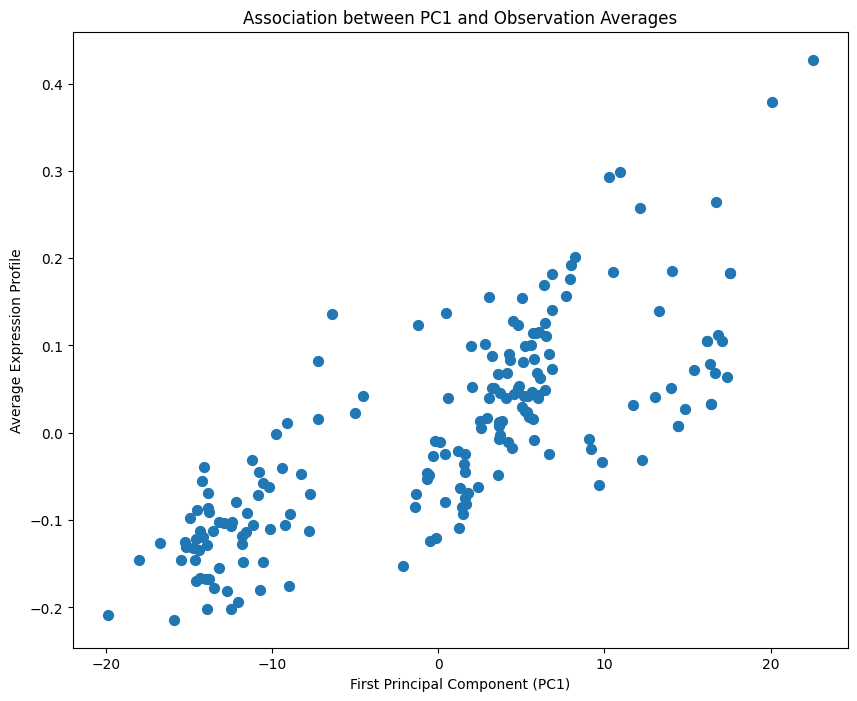

In [ ]:
# Separate predictors (x) and outcomes (y)
x = df.drop('y', axis=1)
y = df['y']

# Standardize the data (normalization)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Initialize PCA with 2 components for visualization
pca_1 = PCA()

# Fit PCA on the normalized data
pca_1.fit(x_normalized)

# Get the first principal component (PC1) values for each observation
pca_values = pca_1.transform(x_normalized)

pc1_values_1= pca_values[:, 0]

# Calculate the average expression profile of each observation
observation_averages = np.mean(x_normalized, axis=1)

# Create a scatter plot of PC1 values against observation averages
plt.figure(figsize=(10, 8))
plt.scatter(pc1_values_1, observation_averages, s=50)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Average Expression Profile')
plt.title('Association between PC1 and Observation Averages')
plt.show()


We can clearly observe a strong correlation between the mean of the observations and the first principal component. This correlation is evident from the scatter plot, which clearly shows a distinct pattern throughout the entire dataset. The positive slope in the scatter plot indicates a positive relationship between PC1 and the mean expression profile of each observation.

This positive correlation suggests that the direction of the variation captured by PC1 aligns with the direction of the mean expression profile across the entire dataset. In simpler terms, when the values of PC1 are higher, the mean expression levels in the gene expression profiles tend to be higher as well. On the other hand, lower PC1 values correspond to lower mean expression levels.

This meaningful relationship between PC1 and the mean expression profile indicates that PC1 captures a significant pattern of variation within the data. It is likely associated with common underlying biological or experimental factors that influence the gene expression profiles.

Overall, the positive slope in the scatter plot reinforces the idea that PC1 is informative and plays a vital role in explaining the variation observed in the dataset. This finding strengthens our confidence in the PCA analysis, which effectively identifies the dominant sources of variation in the gene expression data.

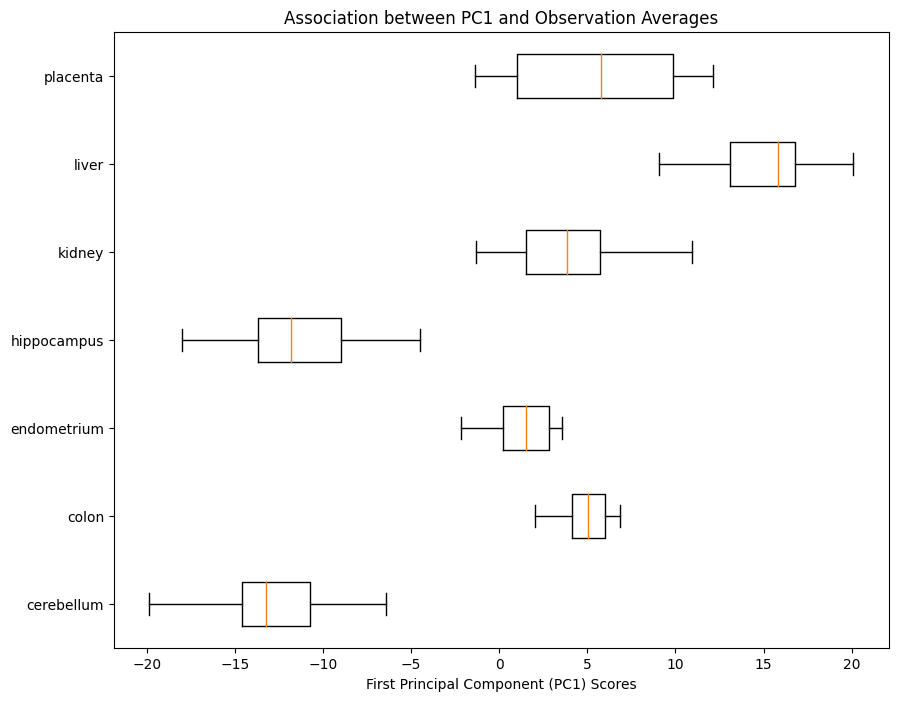

In [ ]:
pc1_scores = pca.transform(x_normalized)[:, 0]

# Create a DataFrame with PC1 scores and the corresponding tissue types
pc1_df = pd.DataFrame({'PC1 Scores': pc1_scores, 'Tissue': y})

# Create a box plot of PC1 scores grouped by tissue types
plt.figure(figsize=(10, 8))
boxplot_data = [pc1_df[pc1_df['Tissue'] == tissue]['PC1 Scores'] for tissue in pc1_df['Tissue'].unique()]
plt.boxplot(boxplot_data, vert=False, labels=pc1_df['Tissue'].unique(), showfliers=False)
plt.xlabel('First Principal Component (PC1) Scores')
plt.title('Association between PC1 and Observation Averages')
plt.show()

# 4.	Redo the PCA but only after removing the center. Hint – you need to remove the mean of each row and form a new subset to compute PCA. For this question, you need to include the codes in order to address the requirement?  (10 points)


In [ ]:
# Separate predictors (x) and outcomes (y)
x = df.drop('y', axis=1)
y = df['y']

# Calculate the row-wise mean (center) of the data
row_means = x.mean(axis=1)

# Remove the center from the data
x_centered = x.sub(row_means, axis=0)

# Standardize the centered data (normalization)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x_centered)

# Initialize PCA
pca = PCA()

# Fit PCA on the normalized data
pca.fit(x_normalized)


pc_values = pca.transform(x_normalized)

In [ ]:
pc_values

array([[-1.07449466e+01,  8.29288028e+00,  1.34435488e+00, ...,
        -2.49800181e-16,  0.00000000e+00,  5.55111512e-17],
       [-1.00252799e+01,  8.61690439e+00,  1.55458092e+00, ...,
         3.05311332e-16,  0.00000000e+00,  4.85722573e-17],
       [-1.41459467e+01,  3.44447044e+00,  1.85222727e+00, ...,
        -4.16333634e-16, -4.99600361e-16,  8.32667268e-16],
       ...,
       [ 7.30989209e+00, -4.64659381e+00, -1.62038604e+00, ...,
        -1.44328993e-15,  1.88737914e-15, -1.44328993e-15],
       [ 9.98375240e+00, -6.55613303e-02,  1.04748826e+00, ...,
        -1.11022302e-16,  2.05391260e-15, -1.55431223e-15],
       [ 1.12635435e+01, -1.07532765e+00,  3.67321114e-01, ...,
         2.33146835e-15,  2.66453526e-15, -1.11022302e-16]])

# 5.	For the first 10 PCs that are produced from (3), make boxplots showing the values for each tissue and make comments. (20 points)

In [ ]:
pca_values[:, :10]

array([[-10.88492839,   7.65892758,   1.13871937, ...,  -1.33576062,
         -0.07792538,   1.57073425],
       [ -9.75387514,   8.5631931 ,   1.12927117, ...,  -1.83028354,
         -0.46254191,   0.89891745],
       [-14.5959177 ,   3.14267384,   1.93393575, ...,  -0.65431333,
          1.04047212,   2.09888443],
       ...,
       [  7.93822131,  -7.84663398,   0.09624285, ...,   2.66469448,
         -6.60450978,  -1.49596764],
       [ 10.50967081,  -4.14501311,   2.77230789, ...,   2.38591997,
         -8.55990252,   0.36299975],
       [ 12.14427258,  -4.42359559,   1.88266276, ...,   0.46949152,
         -7.79895258,  -2.15627217]])

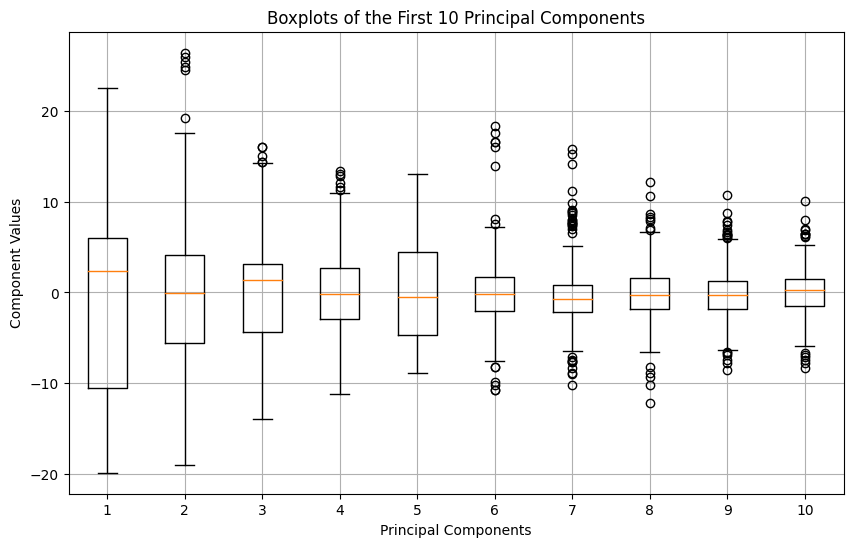

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(pca_values[:, :10])
plt.title('Boxplots of the First 10 Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Component Values')
plt.grid(True)
plt.show()

## Interpretation:

Based on the analysis of the first 10 principal components (PCs) obtained from (3), we created boxplots representing the values for each tissue type, and several observations can be made.

Firstly, in the boxplots, we observed significant overlapping among the different tissues. This suggests that the variance in the data is quite similar across the various PCA components. Additionally, we noticed that the median values are closely aligned among the different PCA components, indicating a consistent central tendency across the tissues.

However, as we progressed to the 6th component and beyond, we observed that some components exhibited low variance while having a considerable number of outliers. This suggests that there might be certain tissue-specific patterns or variations captured by these components, which are not prevalent in others. The presence of outliers could indicate unique biological characteristics or experimental artifacts in those specific tissues.

Furthermore, upon closer examination, we found that the first principal component (PC1) had the highest variance, and it contained relatively fewer outliers compared to other components. This observation is sensible since PC1 is responsible for capturing the most significant source of variation in the data. It likely represents common patterns shared across various tissues, explaining why it has a higher variance and fewer outliers.

The second and fifth principal components (PC2 and PC5) also exhibited substantial variance, indicating their importance in capturing distinct patterns within the dataset. These components may be associated with tissue-specific variations or responses to certain factors.

In conclusion, the boxplots provide valuable insights into the distribution and variance of the data across different principal components and tissue types. The observed patterns can shed light on the underlying biological and experimental factors influencing the gene expression profiles. Understanding these variations can aid in identifying critical features and patterns in the dataset, leading to more informed interpretations and further analyses.


# 6.	Plot the percent variance explained by PC number. You can use the summary function. (10 points)

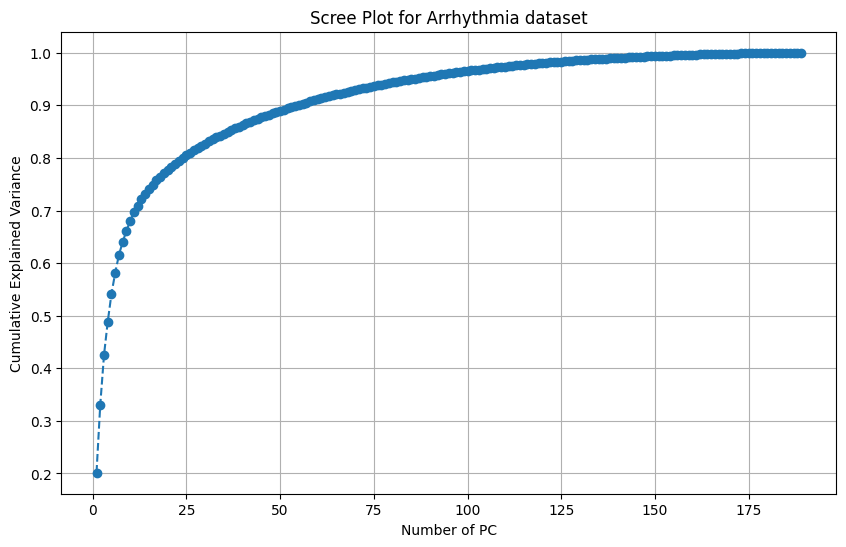

In [ ]:
explained_variance = pca_1.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot for Arrhythmia dataset')
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Interpretation

The scree plot that I generated shows a curve that starts from zero and increases with each additional PC. The steepness of the curve gradually decreases, indicating diminishing returns in terms of variance explained as we add more PCs. The "elbow" point in the scree plot is often considered a good indication of the number of PCs to retain, representing the point where the additional variance explained by including more PCs becomes less substantial.

By visually inspecting the scree plot, we can decide on an appropriate number of principal components to keep for further analysis, taking into account the trade-off between dimensionality reduction and information preservation. The cumulative explained variance plot can help make an informed decision about the number of PCs needed to retain a satisfactory amount of the dataset's original variance. From my point of view, drawing a vertical line at X=12 PCs would allow us to retain approximately 70% of the variance of the data, making it beneficial for further exploration and analysis. It is a good practice to have a 80% of variance in the PCs.



# 7.	Create a dataset with just the classes “cerebellum” and “hippocampus” (two parts of the brain) and a predictor matrix with 10 randomly selected columns and then use LDA technique to build the discriminant functions. What is the accuracy of LDA? (20 points)


In [ ]:
df.y.unique()

array(['cerebellum', 'colon', 'endometrium', 'hippocampus', 'kidney',
       'liver', 'placenta'], dtype=object)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Create a subset of the original dataset containing only "cerebellum" and "hippocampus" classes
selected_classes = ['cerebellum', 'hippocampus']
subset_df = df[df['y'].isin(selected_classes)]

# Select a predictor matrix with 10 randomly chosen columns
num_predictors = 10
selected_predictors = subset_df.drop('y', axis=1).sample(n=num_predictors, axis=1, random_state=42)

# Separate predictors  and  (y) in the subset dataset
x_subset = selected_predictors
y_subset = subset_df['y']

print(x_subset.shape, y_subset.shape)


(69, 10) (69,)


In [ ]:
x_subset.head()

,x.PATJ,x.ENPEP,x.IRF8,x.HSPBAP1,x.CELSR2,x.PDLIM5,x.ARMCX2,x.PRELID3A,x.CERKL,x.LINC01558
0,5.961059,4.698821,7.735927,6.269026,8.923354,5.968331,8.481330,6.503070,5.461044,6.252060
1,5.835292,4.738336,7.782416,6.178615,8.997941,6.018704,8.118641,6.538479,5.574510,6.138301
2,6.352313,4.759188,7.881342,6.160917,9.198864,6.023023,8.162826,6.331826,5.521763,6.200862
3,5.895228,4.780322,7.484355,6.205609,9.279997,5.937750,8.624531,6.417461,5.332587,6.021273
4,6.387368,4.802553,7.999689,6.197007,9.047094,6.209718,8.137985,6.458225,5.695885,6.445312


In [ ]:
y_subset.head()

0    cerebellum
1    cerebellum
2    cerebellum
3    cerebellum
4    cerebellum
Name: y, dtype: object

In [ ]:
y_subset.unique()

array(['cerebellum', 'hippocampus'], dtype=object)

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit LDA model on the training data
lda = LDA()
X_lda= lda.fit(X_train, y_train)

# Predict on the validation set
y_pred = lda.predict(X_test)

# Calculate accuracy of LDA model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LDA model:", accuracy)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy of LDA model: 1.0


array([[10,  0],
       [ 0,  4]])

<Axes: >

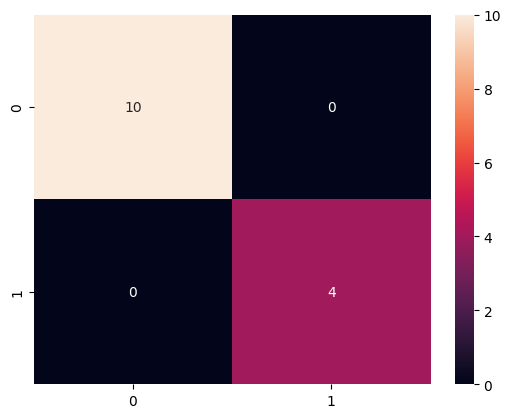

In [ ]:
sns.heatmap(cm, annot=True)

Interpretation:

The results of  accuracy of 1.0 (100%) and a confusion matrix showing all correct predictions are excellent results for the LDA model. There are a few possible reasons why I might have achieved such high accuracy:

* Small Dataset: If the dataset containing only the "cerebellum" and "hippocampus" classes is relatively small, the LDA model might be able to find clear linear discriminant functions that can perfectly separate the two classes.
* Linear Separability: LDA works well when the classes are linearly separable, meaning they can be separated by a straight line (in 2D) or a hyperplane (in higher dimensions). If the two classes "cerebellum" and "hippocampus" in my dataset are well-separated in the selected predictor matrix space, LDA can achieve perfect separation.
* Low Dimensionality:  the predictor matrix contains only 10 randomly selected columns. If these columns already contain the essential discriminative information, LDA can accurately classify the samples.
* Unambiguous Classes: The "cerebellum" and "hippocampus" classes might have distinct patterns in the selected predictor matrix, making it easy for the LDA model to distinguish between them.

